In [26]:
#########################################################################################################################
# Kurs: Data science, studia zaoczne, Informatyka w Biznesie
# Data ostatniej poprawki: 04.12.2018
# Autorzy: Mariusz Czarny, Juliusz Sadowski, Anita Koszalko

# Celem projektu jest zastosowanie języka Python przy użyciu bibliotek pandas, nympy, itp., aby wykonać analizę danych.
# Danymi źródłowymi są pliki tekstowe: campaigns.txt, customers.txt, orderlines.txt, orders.txt, products.txt pobrane z
# serwera: https://drive.google.com/drive/folders/0B1A_5ELLOtW4VXgwOG1oZmhpS0k
# Ścieżka źródłowa dla plików: powinny znajdować się w tym samym katalogu co plik projektowy
# Wersja pythona: 3.6.3
# Plik dostępny jest także pod linkiem: 
# macierz korelacji
# funckja celu
# predykcja sprzedazy
# probka testowa/uczaca
# regresja liniowa/logistyczna

# User story: 
#########################################################################################################################

In [27]:
# import wewenętrznej bazy danych
import sqlite3

In [28]:
# import standardowych bibliotek
import pandas as pd
import numpy as np
import os

In [29]:
# import bibliotek służących do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [30]:
# sprawdza aktualną ścieżkę
%pwd

'C:\\Users\\Mariusz\\studia\\3 semestr\\Data science\\my project'

In [31]:
# połączenie z bazą i wykorzystanie kursora
dbConnection = sqlite3.connect("bookdb");
dbCursor = dbConnection.cursor()

In [32]:
# rozszerzenie plików zawierających dane do wczytania
txtExtention = ".txt"

In [33]:
# tablica z nazwami plików do oczytu, zawierające dane, które będą importowane do tabel bazodanowych
tables = ["Customers", "Orderlines", "Products", "Orders", "Campaigns"]

In [34]:
# wczytywanie kolejnych plików w pętli for
for table in tables:
    # ustawienie scieżki (nazwy plików pisane małymy literami)
    path = os.path.expanduser(table.lower() + txtExtention)
    # wczytywanie pliku używając delimitera tabulacji oraz kodowania 'latin1'
    file = pd.read_csv(path, delimiter="\t", encoding = 'latin1')
    # tworzy na podstawie pliku tabele i wypełnia ją rekordami, jesli istnieje zostaje nadpisana
    file.to_sql(table, dbConnection, if_exists="replace");

In [35]:
ordersSelect = '''SELECT totalprice, campaignid, customerid, orderid from orders '''
orders = pd.read_sql_query(ordersSelect, dbConnection)
orders.head()

,totalprice,campaignid,customerid,orderid
0,190.00,2141,45978,1002854
1,10.00,2173,125381,1002855
2,35.22,2141,103122,1002856
3,10.00,2173,130980,1002857
4,10.00,2141,48553,1002886


In [36]:
customersSelect = '''SELECT customerid, gender from customers '''
customers = pd.read_sql_query(customersSelect, dbConnection)

In [37]:
customers.head()

,customerid,gender
0,174596,M
1,68239,M
2,10203,F
3,174288,F
4,68099,M


In [38]:
ordersCustomer = orders.merge(customers, on='customerid')

In [39]:
ordersCustomer.head()

,totalprice,campaignid,customerid,orderid,gender
0,190.00,2141,45978,1002854,M
1,10.00,2173,125381,1002855,M
2,35.22,2141,103122,1002856,None
3,10.00,2173,130980,1002857,F
4,10.00,2141,48553,1002886,None


In [40]:
selectCampaigns = '''SELECT discount, campaignid from campaigns '''
campaignsDF = pd.read_sql_query(selectCampaigns, dbConnection)
campaignsDF.sort_values(by=["discount"], ascending=0).head(100)

,discount,campaignid
97,50,2098
96,50,2097
65,50,2066
72,50,2073
22,50,2023
187,50,2188
21,45,2022
184,40,2185
37,32,2038
94,30,2095


In [41]:
ordersCustomerAndCampaigns = ordersCustomer.merge(campaignsDF, on='campaignid')
ordersCustomerAndCampaigns.head()

,totalprice,campaignid,customerid,orderid,gender,discount
0,190.00,2141,45978,1002854,M,10
1,35.22,2141,103122,1002856,None,10
2,10.00,2141,48553,1002886,None,10
3,10.00,2141,130970,1003044,F,10
4,17.50,2141,21927,1003046,F,10


In [61]:
orderLinesSelect = '''SELECT orderlineid, orderid, productid, billdate from Orderlines '''
orderLines = pd.read_sql_query(orderLinesSelect, dbConnection)

In [62]:
orderLines.head()

,orderlineid,orderid,productid,billdate
0,1010561,1006414,10834,2011-03-08 00:00:00
1,1010562,1006541,11052,2011-01-20 00:00:00
2,1010563,1006542,11070,2011-01-20 00:00:00
3,1010564,1010154,11196,2009-11-20 00:00:00
4,1010565,1009110,11048,2009-11-12 00:00:00


In [63]:
orderlinesOrderCustomerCampaign = orderLines.merge(ordersCustomerAndCampaigns, on='orderid')

In [64]:
orderlinesOrderCustomerCampaign.head(20)

,orderlineid,orderid,productid,billdate,totalprice,campaignid,customerid,gender,discount
0,1010561,1006414,10834,2011-03-08 00:00:00,36.00,2141,48167,M,10
1,1010560,1006414,10842,2011-01-20 00:00:00,36.00,2141,48167,M,10
2,1010562,1006541,11052,2011-01-20 00:00:00,20.00,2141,15824,M,10
3,1010563,1006542,11070,2011-01-20 00:00:00,19.12,2141,124842,M,10
4,1010564,1010154,11196,2009-11-20 00:00:00,14.95,2173,49720,M,0
5,1010565,1009110,11048,2009-11-12 00:00:00,49.90,2141,102019,F,10
6,1010566,1009110,11196,2009-11-20 00:00:00,49.90,2141,102019,F,10
7,1010567,1008491,10816,2009-11-04 00:00:00,175.00,2141,119644,F,10
8,1010568,1008492,11048,2009-11-11 00:00:00,10.00,2173,105604,M,0
9,1010569,1010189,11196,2009-11-20 00:00:00,14.95,2173,108223,F,0


In [65]:
orderlinesOrderCustomerCampaign["billdate"] = pd.to_datetime(orderlinesOrderCustomerCampaign["billdate"]).dt.year

In [66]:
orderlinesOrderCustomerCampaign = orderlinesOrderCustomerCampaign.drop(columns=["orderlineid", "orderid", "productid", "campaignid"])

In [67]:
orderlinesOrderCustomerCampaign.head(20)

,billdate,totalprice,customerid,gender,discount
0,2011,36.00,48167,M,10
1,2011,36.00,48167,M,10
2,2011,20.00,15824,M,10
3,2011,19.12,124842,M,10
4,2009,14.95,49720,M,0
5,2009,49.90,102019,F,10
6,2009,49.90,102019,F,10
7,2009,175.00,119644,F,10
8,2009,10.00,105604,M,0
9,2009,14.95,108223,F,0


In [68]:
orderlinesOrderCustomerCampaign["gender"] = pd.get_dummies(orderlinesOrderCustomerCampaign["gender"])

In [69]:
orderlinesOrderCustomerCampaign.head(20)

,billdate,totalprice,customerid,gender,discount
0,2011,36.00,48167,0,10
1,2011,36.00,48167,0,10
2,2011,20.00,15824,0,10
3,2011,19.12,124842,0,10
4,2009,14.95,49720,0,0
5,2009,49.90,102019,1,10
6,2009,49.90,102019,1,10
7,2009,175.00,119644,1,10
8,2009,10.00,105604,0,0
9,2009,14.95,108223,1,0


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

model = LinearRegression(fit_intercept=True)
model = GaussianNB()

In [71]:
model.fit(x[, np.newaxis], y)


xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);

SyntaxError: invalid syntax (<ipython-input-71-b0f00eca50fc>, line 1)

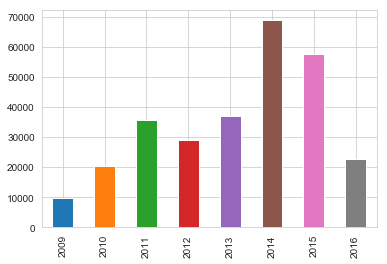

In [72]:
barGraph = orderlinesOrderCustomerCampaign
(barGraph.billdate).value_counts().sort_index().plot(kind='bar')

In [88]:
groupedByCustomerTemp = orderlinesOrderCustomerCampaign.groupby(['customerid', 'billdate']).size()
groupedByCustomer = groupedByCustomerTemp.unstack()
groupedByCustomer = groupedByCustomer.fillna(0)
groupedByCustomer.head(50)

billdate,2009,2010,2011,2012,2013,2014,2015,2016
customerid,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
type(groupedByCustomerTemp)
groupedByCustomerTemp

customerid  billdate
1           2012        1
2           2011        1
3           2014        1
4           2010        1
5           2011        1
6           2010        1
7           2014        3
8           2014        4
9           2010        1
10          2015        3
11          2014        1
12          2012        1
13          2011        1
14          2011        1
15          2014        1
16          2015        2
17          2015        1
18          2016        1
19          2011        2
20          2011        1
21          2011        1
22          2009        2
23          2016        1
24          2012        1
25          2010        2
26          2009        1
27          2011        1
28          2015        1
29          2016        1
30          2012        1
                       ..
189530      2016        2
189531      2016        1
189532      2016        1
189533      2016        1
189534      2016        2
189535      2016        2
189536      2016 

In [101]:
groupedByCustomer.loc[:,2016]

customerid
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        1.0
19        0.0
20        0.0
21        0.0
22        0.0
23        1.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        1.0
30        0.0
         ... 
189530    2.0
189531    1.0
189532    1.0
189533    1.0
189534    2.0
189535    2.0
189536    2.0
189537    1.0
189538    1.0
189539    2.0
189540    2.0
189541    1.0
189542    3.0
189543    1.0
189544    2.0
189545    1.0
189546    1.0
189547    2.0
189548    2.0
189549    1.0
189550    1.0
189551    1.0
189552    2.0
189553    1.0
189554    0.0
189555    1.0
189556    2.0
189557    1.0
189558    0.0
189559    0.0
Name: 2016, Length: 189559, dtype: float64